# **Importing all necesarry libraries**

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import random

# **Loading the data into a data frame**

In [13]:
Credit_card_original_data = pd.read_csv('/content/drive/MyDrive/datasets/creditcard.csv')
Credit_card_original_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Looking for any null values**

In [14]:
print('total dimensions = ' + str(Credit_card_original_data.shape))
Credit_card_original_data.info()
# no null values are found and no missing values and every column is consistent with it's data type

total dimensions = (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 n

# **Normalizing Amount column**

In [17]:
sc = StandardScaler()
Credit_card_original_data['Amount'] = sc.fit_transform(pd.DataFrame(Credit_card_original_data['Amount']))
Credit_card_original_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# **Statistics of Current Data**

In [18]:
Credit_card_original_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,2.913952e-17,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


# **Removing extra/not useful columns**

In [19]:
Credit_card_original_data = Credit_card_original_data.drop('Time', axis = 1)
Credit_card_original_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# **Removing Duplicates**

In [24]:
Credit_card_original_data = Credit_card_original_data.drop_duplicates()
Credit_card_original_data.shape

(275663, 30)

# **Obssrving Highly Unbalanced Data**

In [52]:
Credit_card_original_data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

# **Splitting fraudulent and legit data**

In [27]:
legit_data = []
fraud_data = []

for i in Credit_card_original_data['Class']:
  if i:
    fraud_data.append(i)
  else:
    legit_data.append(i)


# **Splitting target and feature variables**

In [31]:
X = Credit_card_original_data.drop('Class', axis = 1)
y = Credit_card_original_data['Class']


# **Balancing data using smote**

In [102]:
X_balanced, y_balanced = SMOTE().fit_resample(X, y)
print('Rows in X after Smote is = ' + str(len(X_balanced)))
print('Rows in y after Smote is = ' + str(len(y_balanced)))

random_indices = np.random.choice(len(X_balanced), 1200, replace=False)
X_balanced = X_balanced.iloc[random_indices]
y_balanced = y_balanced[random_indices]
print('Rows in X after Smote is = ' + str(len(X_balanced)))
print('Rows in y after Smote is = ' + str(len(y_balanced)))

Rows in X after Smote is = 550380
Rows in y after Smote is = 550380
Rows in X after Smote is = 1200
Rows in y after Smote is = 1200


# **Splitting training and testing Data**

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size= 0.3,random_state= 22)

# **Fitting Logistic Model**

In [104]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_train)
pred = model.predict(X_train)
print('Accuracy of training data is : ' + str(accuracy_score(y_train, pred)))


Accuracy of training data is : 0.9630952380952381


In [105]:
y_pred = model.predict(X_test)
print('Accuracy of test data is : ' + str(accuracy_score(y_pred, y_test)))

Accuracy of test data is : 0.95


# **Finding Logistic Regression's metrics**

<ipython-input-117-e878dfca740d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


(0.0, 1.0)

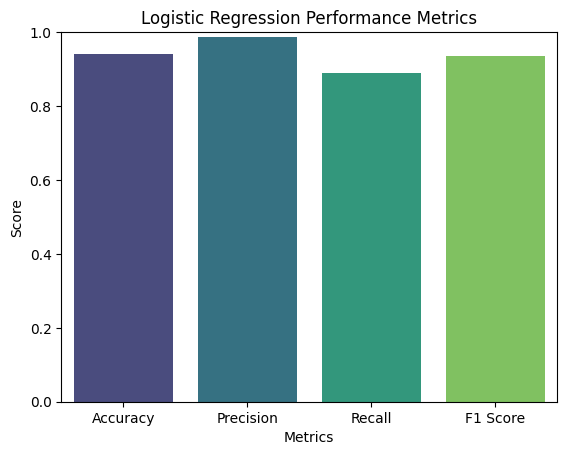

In [117]:
f1_LR_score = f1_score(y_test, y_pred)
precision_LR = precision_score(y_test, y_pred)
recall_LR = recall_score(y_test, y_pred)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_score(y_pred, y_test), precision_LR, recall_LR, f1_LR_score]
sns.barplot(x=metrics, y=values, palette='viridis')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Logistic Regression Performance Metrics')
plt.ylim(0, 1)

# **Logistic regression Confusion Matrix**

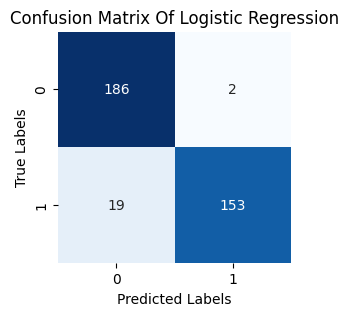

In [118]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Of Logistic Regression')
plt.show()

# **Fitting Random Forest**

In [119]:
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_train)
print('Accuracy of training data is : ' + str(accuracy_score(y_train, pred_2)))

Accuracy of training data is : 1.0


# **Random Forest's Performance Metrics**

<ipython-input-120-3835176ddb02>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


(0.0, 1.0)

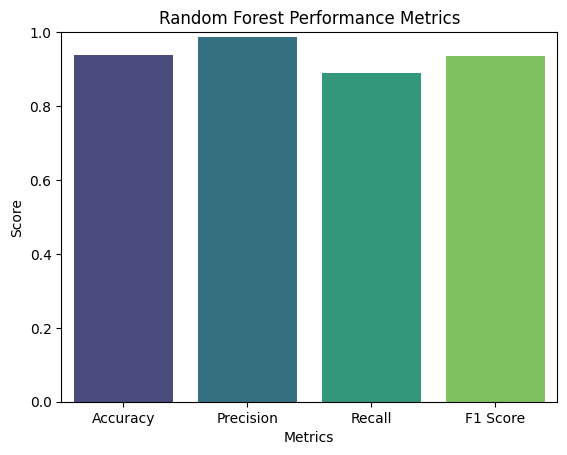

In [120]:
y_pred2 = model_2.predict(X_test)
f1_RF_score = f1_score(y_test, y_pred2)
precision_RF = precision_score(y_test, y_pred2)
recall_RF = recall_score(y_test, y_pred2)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_score(y_pred2, y_test), precision_LR, recall_LR, f1_LR_score]
sns.barplot(x=metrics, y=values, palette='viridis')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Random Forest Performance Metrics')
plt.ylim(0, 1)

# **Random Forest's Confusion Matrix**

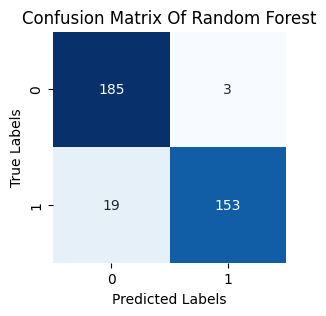

In [121]:
cm = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Of Random Forest')
plt.show()